# The Gadfly plotting package

`Gadfly` is an implementation of the "grammar of graphics" plotting style made popular by Hadley Wickham's [`ggplot2`](https://ggplot2.tidyverse.org) package for `R`.  `Gadfly` is a large package and takes a while to compile.  Also, the rendering of the first plot can take a while.

For convenience I often explicitly import functions from `Gadfly` and its subsidiary packages `Gadfly.Geom` and `Gadfly.Guide`

In [1]:
using DataFrames, DataFramesMeta, RCall, RData
using Gadfly: plot
using Gadfly.Geom: point, line, histogram, density, smooth, path
using Gadfly.Guide: xlabel, ylabel

In [2]:
const formaldehyde = rcopy(R"Formaldehyde")

,carb,optden
1,0.1,0.086
2,0.3,0.269
3,0.5,0.446
4,0.6,0.538
5,0.7,0.626
6,0.9,0.782


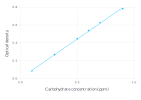

In [3]:
plot(formaldehyde, x = :carb, y = :optden, point, smooth(method=:lm),
    xlabel("Carbohydrate concentration (ppm)"), ylabel("Optical density"))

In [4]:
const dat = convert(Dict{Symbol,Any}, load(Pkg.dir("MixedModels", "test", "dat.rda")));

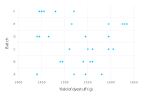

In [5]:
plot(dat[:Dyestuff], x = :Y, y = :G, point, 
    xlabel("Yield of dyestuff (g)"), ylabel("Batch"))

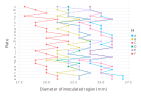

In [6]:
plot(dat[:Penicillin], x = :Y, y = :G, color = :H, point, path,
    xlabel("Diameter of innoculated region (mm)"), ylabel("Plate"))

In [7]:
const contra = @transform(dat[:Contraception], use01 = oftype([1.], :use .== "Y"))

,w,d,use,l,a,urb,use01
1,1,1,N,3+,18.44,Y,0.0
2,2,1,N,0,-5.5599,Y,0.0
3,3,1,N,2,1.44,Y,0.0
4,4,1,N,3+,8.44,Y,0.0
5,5,1,N,0,-13.559,Y,0.0
6,6,1,N,0,-11.56,Y,0.0
7,7,1,N,3+,18.44,Y,0.0
8,8,1,N,3+,-3.5599,Y,0.0
9,9,1,N,1,-5.5599,Y,0.0
10,10,1,N,3+,1.44,Y,0.0


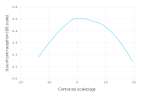

In [8]:
plot(contra, x = :a, y = :use01, smooth, xlabel("Centered, scaled age"),
    ylabel("Use of contraception (0/1 scale)"))